In [123]:
import numpy as np
import matplotlib.pyplot as plt
def crear_grafico_barras_pandas(df, nombre_grafica, columnas_x, columna_y, columna_source):
    """
    Crea un gráfico de barras agrupadas tomando los datos directamente de un DataFrame,
    donde la columna 'source' ya contiene la información del tipo (por ejemplo, "max pull", "media pull").

    :param df: pandas.DataFrame, contiene los datos a graficar.
    :param nombre_grafica: str, título de la gráfica.
    :param columnas_x: list, columnas que se utilizarán como categorías en el eje X.
    :param columna_y: str, columna cuyo valor será graficado.
    :param columna_source: str, columna que indica las diferentes categorías (sources).
    """
    # Obtener los valores únicos de la columna source
    grupos = df[columna_source].unique()

    # Agrupar por las categorías del eje X y la fuente
    data_agrupada = df.groupby(columnas_x + [columna_source])[columna_y].mean().unstack()

    # Posiciones del eje X
    x = np.arange(len(data_agrupada))
    ancho = 0.15  # Ancho de cada barra

    # Crear la gráfica de barras
    plt.figure(figsize=(12, 8))
    for i, source in enumerate(grupos):
        if source in data_agrupada.columns:
            valores = data_agrupada[source].fillna(0).values  # Completar valores faltantes con 0
            plt.bar(x + i * ancho, valores, width=ancho, label=source)

    # Configurar las etiquetas del eje X
    plt.xticks(x + (ancho * (len(grupos) - 1)) / 2, data_agrupada.index, rotation=45)

    # Configurar el resto de la gráfica
    plt.title(nombre_grafica, fontsize=16)
    plt.xlabel(", ".join(columnas_x), fontsize=14)
    plt.ylabel(columna_y, fontsize=14)
    plt.legend(title="Categorías")
    plt.grid(axis="y", alpha=0.3)

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

In [124]:
import pandas as pd
df=pd.read_csv("result_pull.txt", header=None)
df.columns=["type", "k", "agents", "message", "time"]
df["source"]="pull"
df.loc[df["type"] == 0, "source"] = "pull media"
df.loc[df["type"] == 1, "source"] = "pull max"
df

,type,k,agents,message,time,source
0,1,1,50,800,19.085146,pull max
1,1,3,50,900,10.134179,pull max
2,1,5,50,1482,9.017696,pull max
3,1,10,50,2000,8.019629,pull max
4,0,1,50,9300,189.930149,pull media
5,0,3,50,13200,91.129021,pull media
6,0,5,50,20500,85.441491,pull media
7,0,10,50,32000,67.566635,pull media
8,1,2,10,120,9.006408,pull max
9,1,2,20,240,10.104430,pull max


In [125]:
df_pp=pd.read_csv("result_push_pull.txt", header=None)
df_pp.columns=["type", "k", "agents", "message", "time"]
df_pp.loc[df_pp["type"] == 0, "source"] = "push-pull media"
df_pp.loc[df_pp["type"] == 1, "source"] = "push-pull max"
df_pp

,type,k,agents,message,time,source
0,1,2,10,180,9.007910,push-pull max
1,1,2,20,357,9.011528,push-pull max
2,1,2,50,1496,13.016009,push-pull max
3,1,2,100,2400,11.065923,push-pull max
4,1,2,200,5790,11.024150,push-pull max
5,0,1,50,14400,195.530290,push-pull media
6,0,3,50,22500,103.345216,push-pull media
7,0,5,50,28500,79.460185,push-pull media
8,0,10,50,52500,73.512599,push-pull media
9,0,2,10,2640,91.146300,push-pull media


In [126]:
df_p=pd.read_csv("result_push.txt", header=None)
df_p.columns=["type", "k", "agents", "message", "time"]
df_p.loc[df_p["type"] == 0, "source"] = "push media"
df_p.loc[df_p["type"] == 1, "source"] = "push max"
df_p

,type,k,agents,message,time,source
0,1,1,50,500,23.364819,push max
1,1,3,50,150,5.310748,push max
2,1,5,50,750,9.009597,push max
3,1,10,50,1000,7.958662,push max
4,1,2,10,20,5.005479,push max
5,1,2,20,0,3.004081,push max
6,1,2,50,400,11.012406,push max
7,1,2,100,1200,15.034070,push max
8,1,2,200,2000,13.029786,push max
9,0,1,50,7600,307.391260,push media


In [127]:
df=pd.concat([df, df_pp])
df=pd.concat([df, df_p])
df

,type,k,agents,message,time,source
0,1,1,50,800,19.085146,pull max
1,1,3,50,900,10.134179,pull max
2,1,5,50,1482,9.017696,pull max
3,1,10,50,2000,8.019629,pull max
4,0,1,50,9300,189.930149,pull media
5,0,3,50,13200,91.129021,pull media
6,0,5,50,20500,85.441491,pull media
7,0,10,50,32000,67.566635,pull media
8,1,2,10,120,9.006408,pull max
9,1,2,20,240,10.104430,pull max


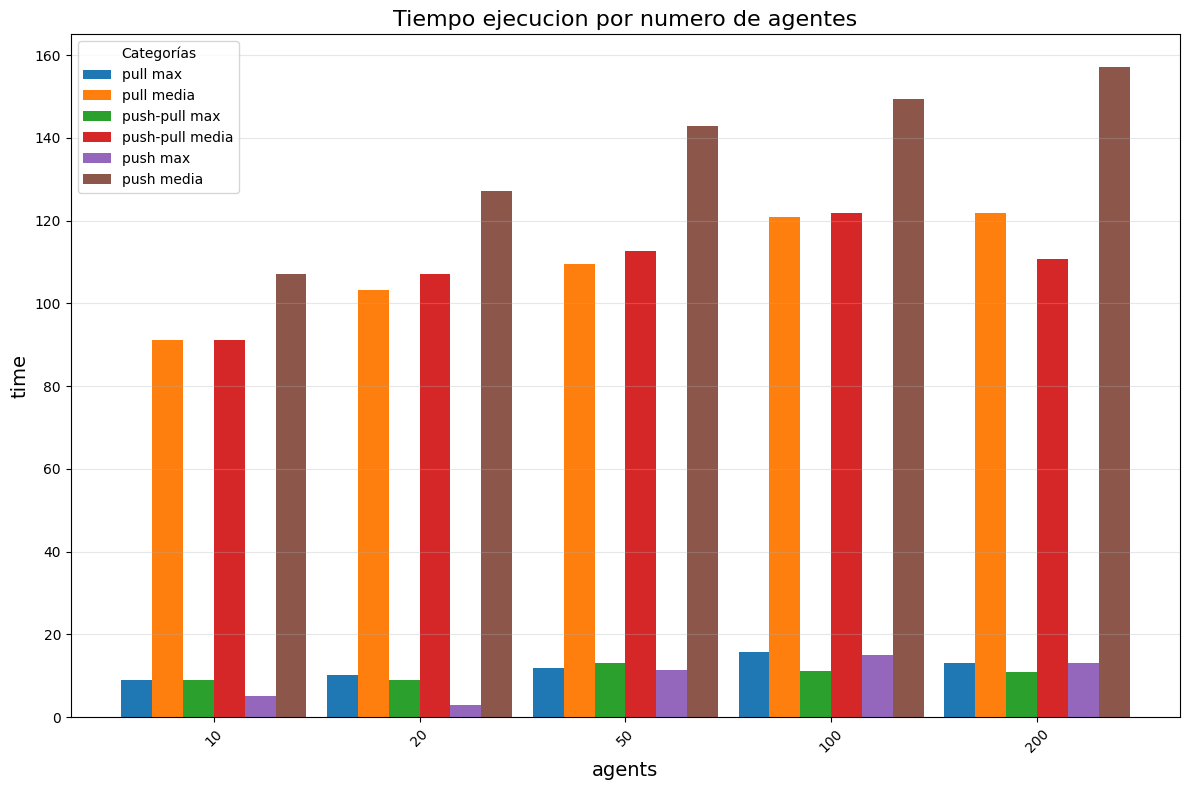

In [128]:
crear_grafico_barras_pandas(df, "Tiempo ejecucion por numero de agentes", ["agents"], "time", "source")

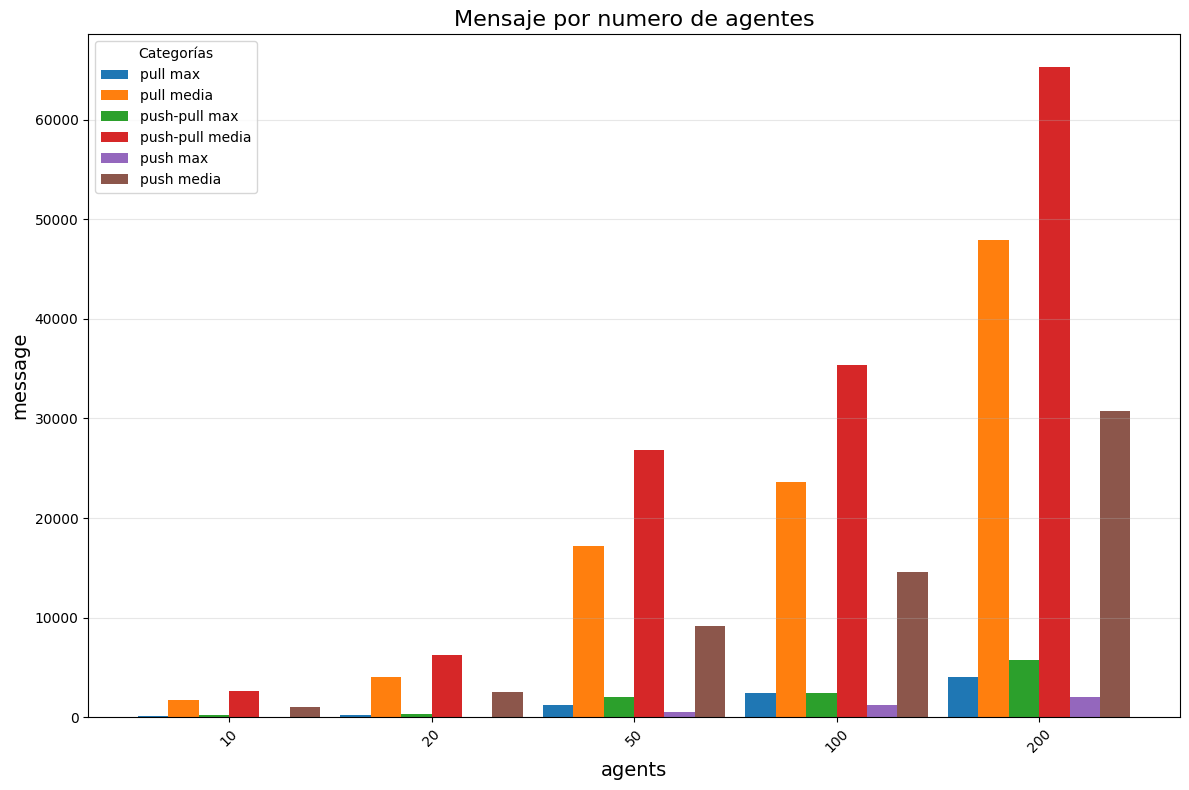

In [129]:
crear_grafico_barras_pandas(df, "Mensaje por numero de agentes", ["agents"], "message", "source")

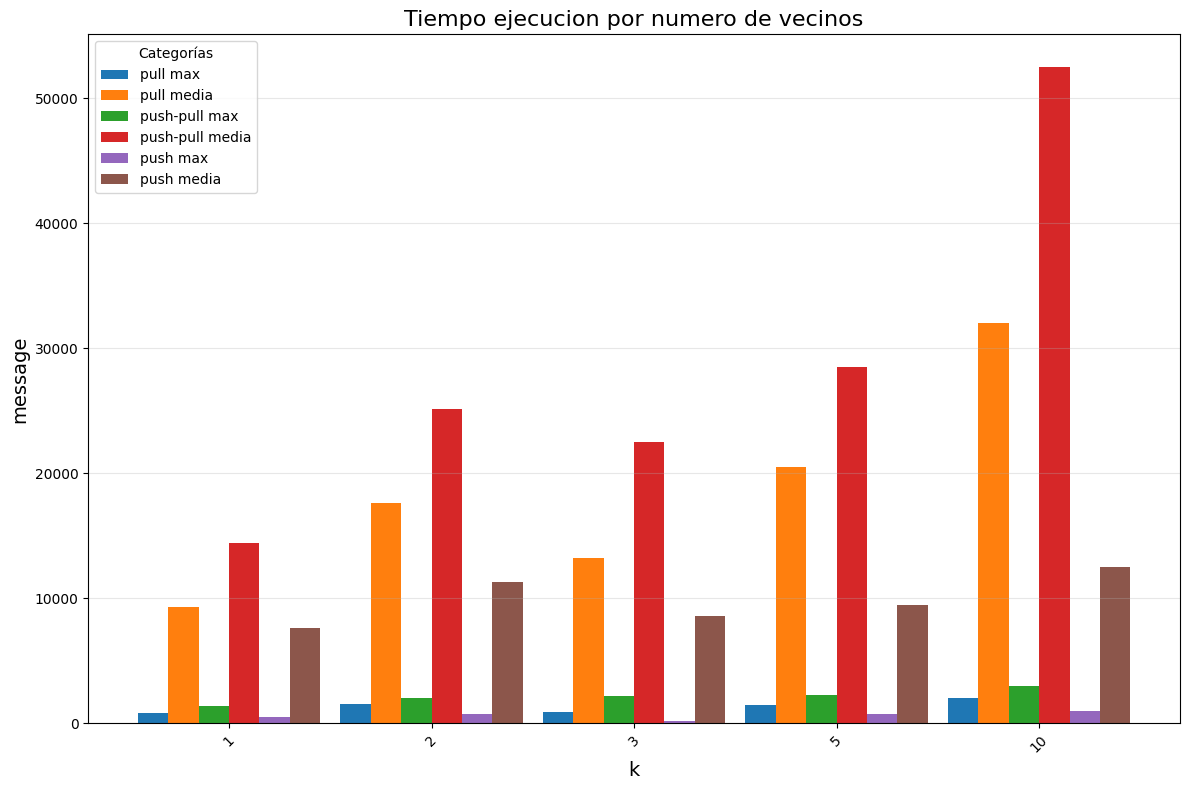

In [130]:
crear_grafico_barras_pandas(df, "Tiempo ejecucion por numero de vecinos", ["k"], "message", "source")

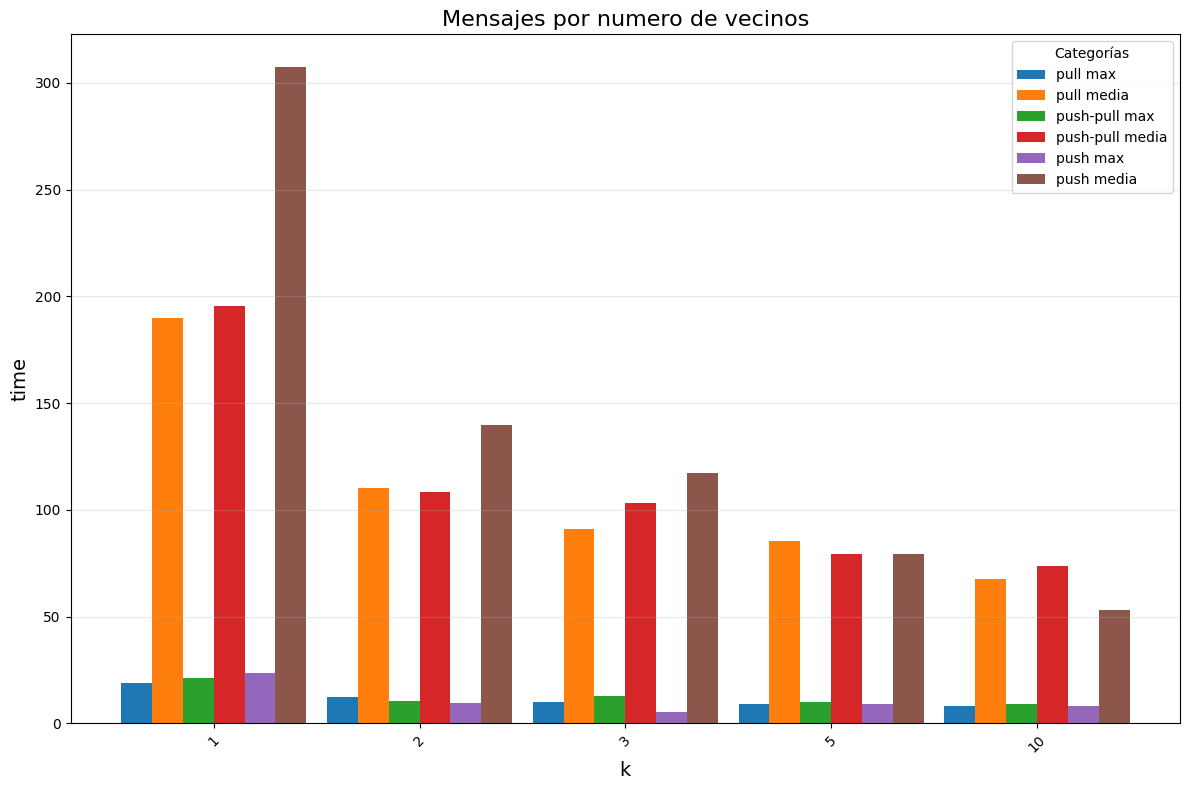

In [131]:
crear_grafico_barras_pandas(df, "Mensajes por numero de vecinos", ["k"], "time", "source")